### Importing the libraries

In [1]:
import numpy as np

# library to handle the dataframe of the dataset
import pandas as pd

# library to plot the data for data visualization
import matplotlib.pyplot as plt

# library to plot the data for data visualization
import seaborn as sns

# Machine Learning Library to do ML tasks such as training
import sklearn

%matplotlib inline



In [2]:
# importing this library so than we can ignore the irrelevant warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# this section is to increase the number of feature columns displayed on kernel
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style='darkgrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Load Data

In [4]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

In [5]:
train.select_dtypes(include=['object']).columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [6]:
# This is the dataframe of the training dataset
train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [7]:
# it shows there are 25192 rows (records) and 42 columns (features) in the training dataframe
train.shape

(25192, 42)

In [8]:
# it shows there are 22544 rows (records) and 41 columns (features) in the training dataframe. As we do not need label column in our test dataframe.
test.shape

(22544, 41)

## Exploratory Analysis

In [9]:
# It will show how many records each feature(column) has and its data type. This also highlights the number of missing values in each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [10]:
# 'num_outbound_cmds' is a redundant column so remove it from both the
#train and test datasets

train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [11]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

__NOTE:__ Machine Learning models understand only numercal values, so we'll convert the categorical(string) features into numercal form. Moreover, it also required to scale all the features on same level to get more efficient and fast training.

## Scaling Numerical Features

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance

cols = train.select_dtypes(include=['float64', 'int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64', 'int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64', 'int64']))

# turn the result back to a dataframe

sc_traindf = pd.DataFrame(sc_train, columns= cols)
sc_testdf = pd.DataFrame(sc_test, columns= cols)

In [13]:
sc_traindf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.720244,-0.354628,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.624317,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-1.320567,0.490836,-0.373886,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,0.334947,-0.299430,1.595477,1.600209,-0.372186,-0.373098,-1.388806,0.042773,-0.373886,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.694082,-0.313230,-0.193018,-0.187141,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.476067,0.059355,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.023115,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


## Encoding Categorical Attributes

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attibutes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# seperate target column from encoded data
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = train[['class']].copy()

In [15]:
train_x = pd.concat([sc_traindf, enctrain], axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [16]:
test_df = pd.concat([sc_testdf, testcat], axis=1)
test_df.shape

(22544, 40)

## Feature Selection

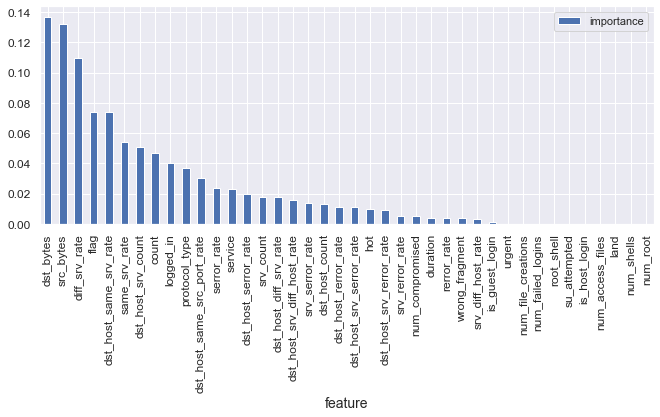

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#fit random forest classifier on the training set
rfc.fit(train_x, train_y)

# extract important feature
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': train_x.columns, 'importance':score})

importances = importances.sort_values('importance', ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11,4)
importances.plot.bar()

In [21]:
from sklearn.feature_selection import RFE
import itertools

rfc =RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attiributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'hot',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'service',
 'flag']

## Dataset Partition

In [22]:
# We are splitting the data into training and testing with 70% and 30% respectively
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.30, random_state=2)


In [23]:
X_train.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
1312,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,1.704080,-0.133837,1.595477,1.600209,-0.372186,-0.373098,-1.366060,-0.125251,-0.373886,-0.429652,-0.877250,-0.868257,-0.066984,-0.445754,-0.287993,1.581378,1.614454,-0.385140,-0.374281,1,46,5
536,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.092361,-0.106238,1.595477,1.600209,-0.372186,-0.373098,-0.888384,-0.069243,-0.373886,0.732059,-0.515732,-0.645507,-0.227251,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,17,5
12385,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,1.250609,-0.120038,-0.640142,-0.633978,2.765176,2.729322,-1.320567,-0.013235,-0.373886,0.732059,-0.868212,-1.001906,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1,6,1
24516,-0.113551,-0.010092,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.266773,-0.340829,-0.640142,-0.633978,-0.372186,-0.373098,-1.366060,0.266804,-0.373886,0.732059,-1.012819,-1.135556,0.039861,0.527134,-0.287993,-0.641804,-0.627365,1.609216,-0.374281,2,41,9
19896,-0.113551,-0.009973,-0.032623,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.720244,-0.313230,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,1.185096,-1.803501,1.264742,1.069663,-0.440940,0.332556,0.164197,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9
14240,-0.113551,-0.010076,-0.038488,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,0.858183,2.143067,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,0.732059,1.029756,0.846914,-0.387518,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,11,9
17166,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.728964,-0.092439,-0.640142,1.488500,2.765176,-0.217977,0.772109,-0.349282,0.015859,-1.823705,0.984566,1.069663,-0.440940,1.143296,0.435512,-0.641804,-0.627365,2.884296,2.777041,1,22,1
15512,-0.113551,-0.010092,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.720244,-0.354628,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,0.732059,-1.021857,-1.135556,0.360395,0.819000,-0.287993,-0.641804,-0.627365,1.347661,-0.374281,2,41,9
14206,-0.113551,-0.010074,-0.037767,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.153405,1.646288,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.334912,0.732059,1.255704,1.069663,-0.387518,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,11,9
10244,-0.113551,-0.010080,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,

## Fitting the models

In [34]:
X_train.protocol_type.unique()

array([1, 2, 0])

In [35]:
X_train.flag.unique()

array([ 5,  1,  9,  2,  4,  6, 10,  7,  3,  8,  0])

In [42]:
np.sort(X_train.service.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [24]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KneighborsClassifier Model 
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

## Evaluate Models

In [25]:
training_accuracies = {}

In [26]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    
    training_accuracies[i] = accuracy
    
    
    


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071666840303904

Model Accuracy:
 0.9071679709651809

Confusion matrix:
 [[7000 1245]
 [ 392 8997]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.85      0.90      8245
      normal       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9960869883971739

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

Plot the accuracies, to get a better idea.

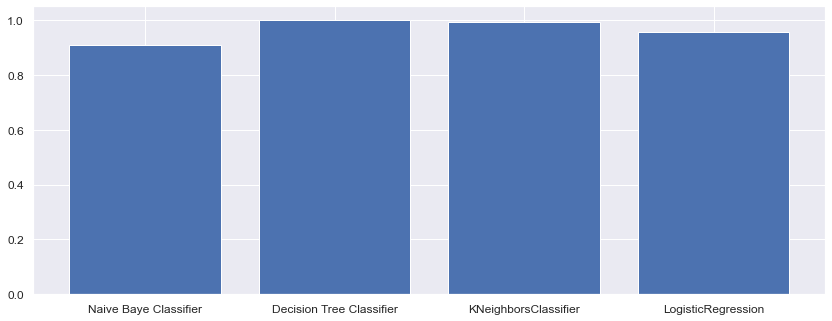

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(training_accuracies.keys()),list(training_accuracies.values()))
plt.show()

## Validating Models

In [28]:
testing_accuracies = {}

In [29]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    
    testing_accuracies[i] = accuracy
    


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.906721354855782

Confusion matrix:
 [[2981  517]
 [ 188 3872]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      3498
      normal       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9947075946017465

Confusion matrix:
 [[3483   15]
 [  25 4035]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99   

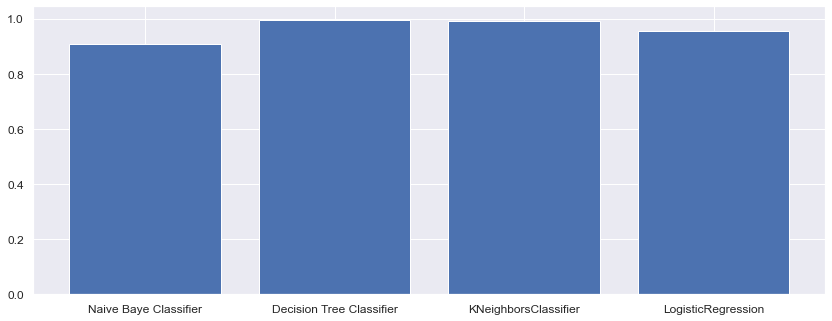

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(testing_accuracies.keys()),list(testing_accuracies.values()))
plt.show()

__NOTE:__ As we see, accuracies on testing data are similar to on training data, so there is no underfitting or overfitting in the model.

In [31]:
# PREDICTING FOR TEST DATA using KNN
pred_knn = KNN_Classifier.predict(test_df)
pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

In [32]:
pred_dt[:10]

array(['anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal',
       'anomaly', 'normal', 'normal', 'anomaly'], dtype=object)

In [55]:
ss =  train[:1].drop(['protocol_type', 'service', 'flag', 'class'], axis=1)

In [66]:
ss = np.array(ss)

In [67]:
p = models[0][1].predict(ss)

In [71]:
print('this is what we get {} in the end'.format(p[0]))

this is what we get normal in the end


In [ ]:
models[0][1].predict()

In [60]:
tt = pd.DataFrame({'protocol_type': 1,
                   'service': 45,
                   'flag': 1}, index=[0])

In [45]:
train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [61]:
ss = pd.concat([ss,tt], axis=1)

In [63]:
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,19,9
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,13,9
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1,55,2


In [61]:
pred_knn[:10]

array(['anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal'], dtype=object)

# Save the models

In [62]:
model_names = ["nb_model.pkl","dt_model.pkl","knn_model.pkl","lgr_model.pkl"]
import pickle

In [63]:
for i in range(len(models)):
    with open(model_names[i], 'wb') as file:
        pickle.dump(models[i][1], file)
    

__NOTE:__ Decision Tree has the MAXIMUM ACCURACY, so it'll be used for deployment.